In [31]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2022, day=22)

import re
def parses(input):
    board, instructions = input.split('\n\n')
    instructions = [ int(i) if i not in 'RL' else i 
                for i in re.split('(R|L)', instructions)]

    lines = board.split('\n')
    H, W = len(lines), max(map(len, lines))
    h_rocks = [set() for _ in range(H)]
    w_rocks = [set() for _ in range(W)]

    widths = [None for _ in range(H)]
    heights = [[H,0] for _ in range(W)]
    for i, line in enumerate(lines):
        w, prefix = len(line), len(line.strip())
        widths[i] = (w-prefix, w)
        for j, v in enumerate(line):
            if j >= widths[i][0]:
                heights[j][0] = min(heights[j][0], i)
                if j < widths[i][1]:
                    heights[j][1] = max(heights[j][1], i+1) 
            if v == '#':
                h_rocks[i].add(j)
                w_rocks[j].add(i)
    return (widths, heights, h_rocks, w_rocks), instructions

data = parses(puzzle.input_data)

In [32]:
sample = parses("""        ...#
        .#..
        #...
        ....
...#.......#
........#...
..#....#....
..........#.
        ...#....
        .....#..
        .#......
        ......#.

10R5L5R10L4R5L5""")

In [93]:
def visualize(trail, board):
    widths, heights, h_rocks, w_rocks = board
    viz = ''
    for i, (s, e) in enumerate(widths):
        viz += ' ' * s
        for j in range(s,e):
            if (i,j) in trail:
                viz += '>v<^'[trail[i,j]]
            elif j in h_rocks[i]:
                viz += '#'
            else:
                viz += '.'
        viz += '\n'
    print(viz)

In [94]:
visualize({(0,0,): 0}, board)

        ...#
        .#..
        #...
        ....
...#.......#
........#...
..#....#....
..........#.
        ...#....
        .....#..
        .#......
        ......#.



In [59]:
[[0,0,0]]*2

[[0, 0, 0], [0, 0, 0]]

In [177]:
from PIL import Image
def visualize(trail,board, zoom=10):
    widths, heights, h_rocks, w_rocks = board
    max_w = max(w for _, w in widths)
    viz = [[] for _ in widths]
    for i, (s, e) in enumerate(widths):
        viz[i] += [[0,0,0]] * s
        for j in range(s,e):
            if (i,j) in trail:
                viz[i] += [[[255,0,0],[0,255,0],[255,0,255],[0,0,255]][trail[i,j]]]
            elif j in h_rocks[i]:
                viz[i] += [[255,255,255]]
            else:
                viz[i] += [[64,64,64]]
        viz[i] += [[0,0,0]] * (max_w-e)
    a = np.array(viz, dtype=np.uint8)
    im = Image.fromarray(a, 'RGB')
    h, w = im.size
    return im.resize((h*zoom,w*zoom), Image.NEAREST)

In [263]:
def solve_a(data):
    board, instructions = data
    widths, heights, h_rocks, w_rocks = board
    i, j = 0, widths[0][0]

    dirs = [(0,1),(1,0),(0,-1),(-1,0)]
    facing = 0
    trail = {(i,j): 0}
    for ins in instructions:
        print('-'*3, ins)
        if isinstance(ins, str):
            facing = (facing+{'L':-1, 'R':+1}[ins])%4
            trail[i,j] = facing
#             display(visualize(trail, board, 3))
            continue

        for _ in range(ins):
            di, dj = dirs[facing]
            i2, j2 = i+di, j+dj
            if i != i2:
                if i2 >= heights[j][1]:
                    i2 = heights[j][0]
                if i2 < heights[j][0]:
                    i2 = heights[j][1]-1
            if j != j2:
                if j2 >= widths[i][1]:
                    j2 = widths[i][0]
                if j2 < widths[i][0]:
                    j2 = widths[i][1]-1
            if j2 in h_rocks[i2] or i2 in w_rocks[j2]:
                break
            i, j = i2, j2
            trail[i,j] = facing
#         display(visualize(trail, board, 3))

    return 1000*(i+1) + 4*(j+1) + facing

---

In [291]:
edge_pairs_sample = [
    [([0], range(8,12)), ([4], range(3,-1,-1)), 2],
    [(range(0,4), [8]), ([4], range(4,8)), -1],
    [(range(0,4), [11]), (range(15,11,-1), [15]), 2],
    [(range(4,8), [0]), ([11], range(12,16)), 1],
    [(range(4,8), [11]), ([8], range(15,11,-1)), 1],
    [([7], range(4)), ([11], range(11,7,-1)), 2],
    [([7], range(4,8)), (range(15,11,-1), [8]), -1],
]

In [359]:
edge_pairs_data = [
    [([0], range(50,100)), (range(150,200), [0]), 1],
    [([0], range(100,150)), ([[199], range(0,50)]), 0],
    [(range(0,50), [50]), (range(149,99,-1), [0]), 2],
    [(range(0,50), [149]), (range(149,99,-1), [99]), 2],
    [(range(50,100), [50]), ([100], range(0,50)), -1],
    [([49], range(100,150)), (range(50,100), [99],), 1],
    [([149], range(50,100)), (range(150,200), [49]), 1],
]

In [371]:
def solve_b(data, edge_pairs):
    edge_pairs += [(b,a,-c) for a,b,c in edge_pairs]
    board, instructions = data
    widths, heights, h_rocks, w_rocks = board
    i, j = 0, widths[0][0]

    dirs = [(0,1),(1,0),(0,-1),(-1,0)]
    facing = 0
    trail = {(i,j): 0}
    for ins in instructions:
        print('-'*3, ins)
        if isinstance(ins, str):
            facing = (facing+{'L':-1, 'R':+1}[ins])%4
            trail[i,j] = facing
#             display(visualize(trail, board, 10))
            continue

        for _ in range(ins):
            di, dj = dirs[facing]
            i2, j2 = i+di, j+dj
            new_facing = facing
            if i2 >= heights[j][1] or i2 < heights[j][0] or j2 >= widths[i][1] or j2 < widths[i][0]:
#                 print('Out-of-bounds')
                # ignore i2,j2
                for (fromi, fromj), (toi, toj), turn in edge_pairs:
                    if i in fromi and j in fromj:
#                         print(i,j,fromi, fromj, toi, toj, turn)
                        if turn in (1,-1):
                            i2, j2 = toi[fromj.index(j)], toj[fromi.index(i)]
                        else:
                            i2, j2 = toi[fromi.index(i)], toj[fromj.index(j)]
                            
                        new_facing = (facing + turn) % 4
#                         print(i2,j2,new_facing)
            if j2 in h_rocks[i2] or i2 in w_rocks[j2]:
#                 print(f'rock @ {i2},{j2}')
                break
            i, j = i2, j2
            facing = new_facing
            trail[i,j] = facing
#             print('>v<^'[facing])
        display(visualize(trail, board, 2))

    return 1000*(i+1) + 4*(j+1) + facing

In [402]:
def check(data, edge_pairs):
    edge_pairs += [(b,a,-c) for a,b,c in edge_pairs]
    board, instructions = data
    widths, heights, h_rocks, w_rocks = board
    h_rocks = [set() for _ in h_rocks]
    w_rocks = [set() for _ in w_rocks]
    
    max_w = max(w for _, w in widths)
    max_h = max(h for _, h in heights)
    dirs = [(0,1),(1,0),(0,-1),(-1,0)]
    
    for i in tqdm(range(max_h)):
        for j in tqdm(range(max_w),leave=False):
            for facing in range(4):
                oi, oj, ofacing = i, j, facing
                trail = {(i,j): facing}
                if i >= heights[j][1] or i < heights[j][0] or j >= widths[i][1] or j < widths[i][0]:
                    continue

                for ins in [1, 'L', 'L', 1, 'L', 'L']:
                    if isinstance(ins, str):
                        facing = (facing+{'L':-1, 'R':+1}[ins])%4
                        trail[i,j] = facing
                    else:
                        for _ in range(ins):
                            di, dj = dirs[facing]
                            i2, j2 = i+di, j+dj
                            new_facing = facing
                            if i2 >= heights[j][1] or i2 < heights[j][0] or j2 >= widths[i][1] or j2 < widths[i][0]:
                                for (fromi, fromj), (toi, toj), turn in edge_pairs:
                                    if i in fromi and j in fromj:
                                        if turn in (1,-1):
                                            i2, j2 = toi[fromj.index(j)], toj[fromi.index(i)]
                                        else:
                                            i2, j2 = toi[fromi.index(i)], toj[fromj.index(j)]

                                        new_facing = (facing + turn) % 4
#                             if j2 in h_rocks[i2] or i2 in w_rocks[j2]:
#                                 break
                            i, j = i2, j2
                            facing = new_facing
                            trail[i,j] = facing
                    

                if not (i == oi and j == oj):
                    print(f"{oi},{oj},{ofacing} -> {i},{j},{facing}")
                    print(trail)
                    display(visualize(trail, (widths, heights, h_rocks, w_rocks), 3))
                    return

In [ ]:
check(data, edge_pairs_data)

--- 10


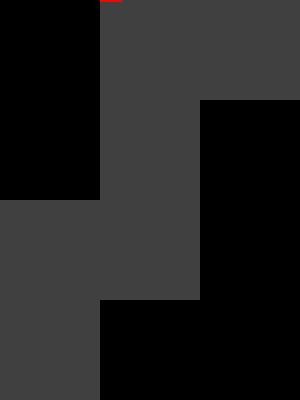

--- R
--- 10


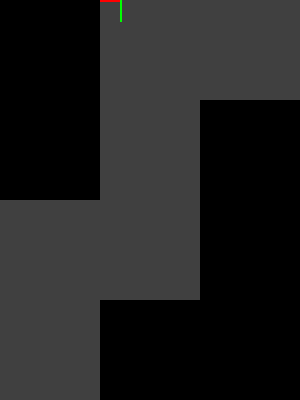

--- L
--- 50


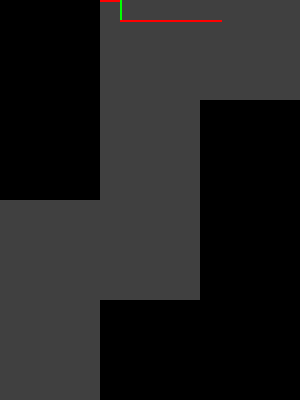

--- R
--- 50


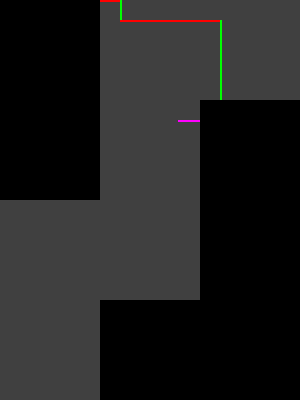

--- L
--- 50


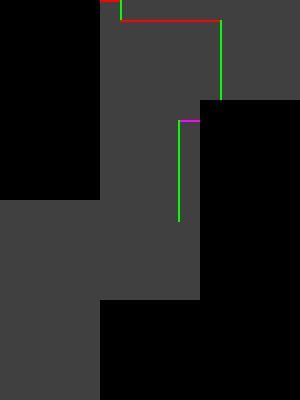

--- L
--- 50


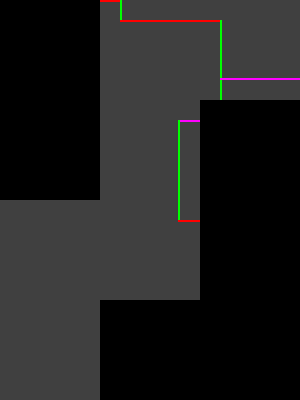

--- R
--- 50


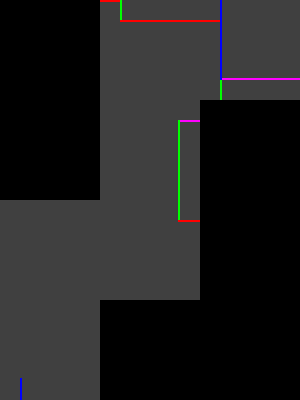

--- R
--- 50


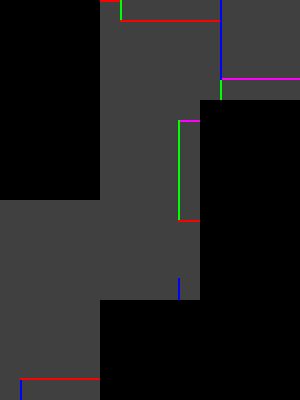

--- L
--- 50


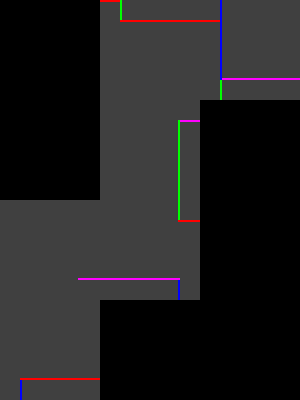

--- R
--- 50


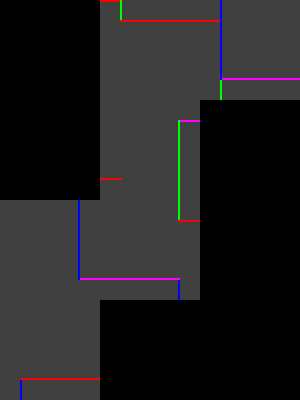

--- L
--- 50


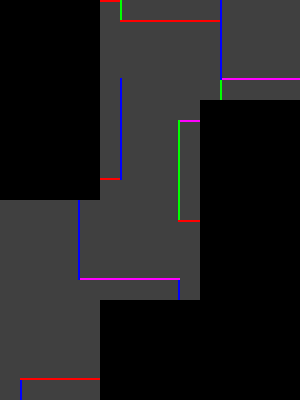

40247

In [377]:
board, instructions = data
widths, heights, h_rocks, w_rocks = board
no_h_rocks = [set() for _ in h_rocks]
no_w_rocks = [set() for _ in w_rocks]

solve_b(
    [(widths, heights, no_h_rocks, no_w_rocks),
#     [10, 'R', 10, 'L', 198],
#     ['R', 10, 'L', 10, 'R', 198],
#      [10,'R',60,'L', 198]
     [10,'R',10,'L',50,'R',50,'L',50,'L',50,'R',50,'R',50,'L',50,'R',50,'L',50]
    ],
    edge_pairs_data
)

In [362]:
# solve_b(sample, edge_pairs_sample)

In [363]:
solve_b(data, edge_pairs_data)

--- 16
--- L
--- 48
--- L
--- 13
--- R
--- 34
--- L
--- 44
--- L
--- 21
--- R
--- 31
--- R
--- 17
--- R
--- 42
--- R
--- 37
--- R
--- 48
--- L
--- 39
--- L
--- 40
--- R
--- 16
--- R
--- 29
--- L
--- 12
--- R
--- 23
--- R
--- 8
--- L
--- 42
--- R
--- 19
--- L
--- 26
--- L
--- 31
--- L
--- 34
--- R
--- 8
--- L
--- 37
--- R
--- 35
--- R
--- 22
--- R
--- 22
--- L
--- 34
--- R
--- 4
--- L
--- 11
--- R
--- 28
--- L
--- 42
--- L
--- 30
--- L
--- 42
--- L
--- 24
--- L
--- 40
--- R
--- 31
--- L
--- 14
--- L
--- 2
--- L
--- 46
--- L
--- 1
--- L
--- 15
--- R
--- 45
--- R
--- 4
--- L
--- 44
--- R
--- 6
--- L
--- 13
--- R
--- 20
--- L
--- 38
--- R
--- 16
--- R
--- 26
--- L
--- 8
--- L
--- 6
--- R
--- 15
--- L
--- 47
--- R
--- 10
--- L
--- 13
--- R
--- 30
--- R
--- 27
--- L
--- 21
--- L
--- 5
--- R
--- 16
--- R
--- 23
--- R
--- 24
--- L
--- 23
--- L
--- 13
--- L
--- 3
--- R
--- 14
--- R
--- 3
--- R
--- 41
--- R
--- 17
--- R
--- 18
--- R
--- 35
--- R
--- 45
--- R
--- 50
--- L
--- 10
--- R
--- 28
--- 

--- L
--- 46
--- L
--- 7
--- L
--- 2
--- L
--- 2
--- R
--- 45
--- R
--- 11
--- L
--- 19
--- R
--- 2
--- R
--- 47
--- R
--- 33
--- R
--- 11
--- R
--- 25
--- R
--- 42
--- R
--- 8
--- R
--- 41
--- L
--- 24
--- R
--- 36
--- R
--- 7
--- L
--- 45
--- L
--- 29
--- L
--- 20
--- L
--- 35
--- L
--- 28
--- R
--- 3
--- R
--- 43
--- R
--- 33
--- R
--- 25
--- R
--- 25
--- L
--- 1
--- R
--- 33
--- R
--- 2
--- R
--- 34
--- R
--- 25
--- R
--- 24
--- R
--- 35
--- L
--- 46
--- R
--- 6
--- L
--- 48
--- R
--- 37
--- L
--- 21
--- R
--- 45
--- R
--- 5
--- L
--- 41
--- L
--- 44
--- R
--- 32
--- R
--- 46
--- L
--- 17
--- R
--- 5
--- R
--- 19
--- R
--- 47
--- R
--- 39
--- L
--- 4
--- R
--- 20
--- R
--- 26
--- R
--- 8
--- R
--- 24
--- L
--- 30
--- L
--- 15
--- R
--- 29
--- R
--- 5
--- R
--- 7
--- R
--- 33
--- R
--- 30
--- L
--- 49
--- R
--- 34
--- L
--- 48
--- L
--- 2
--- L
--- 47
--- R
--- 1
--- L
--- 15
--- L
--- 1
--- L
--- 25
--- L
--- 47
--- R
--- 15
--- L
--- 14
--- R
--- 1
--- R
--- 15
--- R
--- 20
--- R


--- 10
--- L
--- 40
--- R
--- 26
--- L
--- 47
--- L
--- 1
--- R
--- 47
--- L
--- 25
--- R
--- 3
--- R
--- 44
--- L
--- 35
--- R
--- 21
--- L
--- 36
--- L
--- 43
--- R
--- 28
--- L
--- 4
--- L
--- 21
--- R
--- 20
--- L
--- 6
--- R
--- 2
--- R
--- 1
--- R
--- 42
--- R
--- 10
--- L
--- 11
--- R
--- 33
--- R
--- 44
--- L
--- 1
--- R
--- 37
--- R
--- 48
--- L
--- 26
--- L
--- 46
--- R
--- 11
--- R
--- 45
--- L
--- 22
--- R
--- 18
--- L
--- 34
--- R
--- 43
--- L
--- 26
--- L
--- 41
--- L
--- 27
--- L
--- 14
--- R
--- 9
--- R
--- 14
--- L
--- 2
--- R
--- 41
--- R
--- 19
--- R
--- 47
--- L
--- 1
--- R
--- 42
--- L
--- 11
--- R
--- 17
--- R
--- 21
--- L
--- 12
--- L
--- 33
--- L
--- 10
--- L
--- 30
--- R
--- 43
--- R
--- 46
--- R
--- 47
--- L
--- 9
--- R
--- 17
--- L
--- 14
--- L
--- 15
--- L
--- 6
--- L
--- 43
--- R
--- 44
--- L
--- 22
--- L
--- 40
--- L
--- 50
--- L
--- 2
--- L
--- 19
--- R
--- 30
--- L
--- 38
--- R
--- 48
--- L
--- 1
--- R
--- 23
--- L
--- 32
--- R
--- 33
--- R
--- 31
--- L


92257

In [279]:
# board, _ = sample

# widths, heights, h_rocks, w_rocks = board

# h_rocks[8]

# set((i,j) for i, r in enumerate(h_rocks) for j in r)

# set((i,j) for j, c in enumerate(w_rocks) for i in c)

# h_rocks[8]

# w_rocks[14]

In [280]:
solve_b(sample)

--- 10
>
>
rock @ 0,11
--- R
--- 5
v
v
v
v
v
--- L
--- 5
>
Out-of-bounds
5 11 range(4, 8) [11] [8] range(15, 11, -1) 1
8 14 1
v
v
v
rock @ 11,14
--- R
--- 10
<
<
<
<
rock @ 10,9
--- L
--- 4
v
Out-of-bounds
11 10 [11] range(11, 7, -1) [7] range(0, 4) -2
7 1 3
^
^
^
--- R
--- 5
>
>
>
>
>
--- L
--- 5
^
Out-of-bounds
4 6 [4] range(4, 8) range(0, 4) [8] 1
2 8 0
rock @ 2,8


5031

In [201]:
edge_pairs

[[([0], range(8, 12)), ([4], range(3, -1, -1))],
 [(range(0, 4), [8]), ([4], range(4, 8))],
 [(range(0, 4), [11]), (range(15, 11, -1), 15)],
 [(range(4, 8), [0]), (11, range(12, 16))],
 [(range(4, 8), [11]), (9, range(15, 11, -1))],
 [([7], range(0, 4)), ([11], range(11, 7, -1))],
 [([7], range(4, 8)), (range(15, 11, -1), [8])],
 (([4], range(3, -1, -1)), ([0], range(8, 12))),
 (([4], range(4, 8)), (range(0, 4), [8])),
 ((range(15, 11, -1), 15), (range(0, 4), [11])),
 ((11, range(12, 16)), (range(4, 8), [0])),
 ((9, range(15, 11, -1)), (range(4, 8), [11])),
 (([11], range(11, 7, -1)), ([7], range(0, 4))),
 ((range(15, 11, -1), [8]), ([7], range(4, 8)))]

In [ ]:
def move_step(i,j,di,dj):
    if 0 <= i < 4:
        if j+dj==7:
            return 4, 8-i
        if j+dj==12:
            return 12-i, 16
        if i+di == -1:
            return 4, 4-j
    elif 4 <= i < 8:
        if j+dj == -1:
            return
        if j+dj == 12:
            return 

In [187]:
solve_a(data)

--- 16
--- L
--- 48
--- L
--- 13
--- R
--- 34
--- L
--- 44
--- L
--- 21
--- R
--- 31
--- R
--- 17
--- R
--- 42
--- R
--- 37
--- R
--- 48
--- L
--- 39
--- L
--- 40
--- R
--- 16
--- R
--- 29
--- L
--- 12
--- R
--- 23
--- R
--- 8
--- L
--- 42
--- R
--- 19
--- L
--- 26
--- L
--- 31
--- L
--- 34
--- R
--- 8
--- L
--- 37
--- R
--- 35
--- R
--- 22
--- R
--- 22
--- L
--- 34
--- R
--- 4
--- L
--- 11
--- R
--- 28
--- L
--- 42
--- L
--- 30
--- L
--- 42
--- L
--- 24
--- L
--- 40
--- R
--- 31
--- L
--- 14
--- L
--- 2
--- L
--- 46
--- L
--- 1
--- L
--- 15
--- R
--- 45
--- R
--- 4
--- L
--- 44
--- R
--- 6
--- L
--- 13
--- R
--- 20
--- L
--- 38
--- R
--- 16
--- R
--- 26
--- L
--- 8
--- L
--- 6
--- R
--- 15
--- L
--- 47
--- R
--- 10
--- L
--- 13
--- R
--- 30
--- R
--- 27
--- L
--- 21
--- L
--- 5
--- R
--- 16
--- R
--- 23
--- R
--- 24
--- L
--- 23
--- L
--- 13
--- L
--- 3
--- R
--- 14
--- R
--- 3
--- R
--- 41
--- R
--- 17
--- R
--- 18
--- R
--- 35
--- R
--- 45
--- R
--- 50
--- L
--- 10
--- R
--- 28
--- 

--- 11
--- R
--- 17
--- R
--- 34
--- L
--- 12
--- R
--- 47
--- L
--- 46
--- R
--- 41
--- L
--- 42
--- L
--- 19
--- L
--- 26
--- R
--- 22
--- R
--- 28
--- R
--- 37
--- L
--- 26
--- R
--- 41
--- L
--- 21
--- R
--- 8
--- L
--- 25
--- R
--- 18
--- R
--- 26
--- R
--- 37
--- R
--- 18
--- L
--- 38
--- R
--- 5
--- R
--- 3
--- R
--- 8
--- L
--- 25
--- R
--- 20
--- R
--- 2
--- R
--- 38
--- R
--- 50
--- R
--- 17
--- L
--- 36
--- L
--- 9
--- L
--- 6
--- R
--- 44
--- R
--- 23
--- R
--- 5
--- L
--- 38
--- L
--- 37
--- L
--- 1
--- L
--- 1
--- L
--- 30
--- R
--- 28
--- L
--- 19
--- L
--- 33
--- L
--- 25
--- R
--- 35
--- R
--- 23
--- R
--- 32
--- L
--- 50
--- L
--- 46
--- L
--- 42
--- L
--- 4
--- L
--- 9
--- R
--- 12
--- L
--- 46
--- L
--- 7
--- L
--- 2
--- L
--- 2
--- R
--- 45
--- R
--- 11
--- L
--- 19
--- R
--- 2
--- R
--- 47
--- R
--- 33
--- R
--- 11
--- R
--- 25
--- R
--- 42
--- R
--- 8
--- R
--- 41
--- L
--- 24
--- R
--- 36
--- R
--- 7
--- L
--- 45
--- L
--- 29
--- L
--- 20
--- L
--- 35
--- L
--- 

--- 30
--- R
--- 41
--- L
--- 11
--- L
--- 9
--- R
--- 50
--- L
--- 16
--- L
--- 48
--- R
--- 5
--- L
--- 7
--- R
--- 44
--- L
--- 11
--- L
--- 6
--- R
--- 11
--- R
--- 22
--- R
--- 44
--- R
--- 50
--- L
--- 5
--- R
--- 18
--- R
--- 38
--- L
--- 46
--- L
--- 35
--- L
--- 45
--- R
--- 9
--- L
--- 45
--- L
--- 19
--- R
--- 22
--- L
--- 40
--- R
--- 21
--- R
--- 23
--- R
--- 29
--- L
--- 14
--- R
--- 35
--- L
--- 47
--- R
--- 8
--- L
--- 8
--- R
--- 27
--- R
--- 33
--- R
--- 22
--- L
--- 3
--- L
--- 2
--- R
--- 19
--- L
--- 7
--- R
--- 41
--- L
--- 33
--- L
--- 46
--- L
--- 26
--- R
--- 9
--- L
--- 9
--- L
--- 22
--- L
--- 15
--- L
--- 45
--- L
--- 36
--- L
--- 46
--- L
--- 28
--- R
--- 40
--- R
--- 10
--- L
--- 40
--- R
--- 26
--- L
--- 47
--- L
--- 1
--- R
--- 47
--- L
--- 25
--- R
--- 3
--- R
--- 44
--- L
--- 35
--- R
--- 21
--- L
--- 36
--- L
--- 43
--- R
--- 28
--- L
--- 4
--- L
--- 21
--- R
--- 20
--- L
--- 6
--- R
--- 2
--- R
--- 1
--- R
--- 42
--- R
--- 10
--- L
--- 11
--- R
--- 3

126350

In [49]:
data

(([(50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 150),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50, 100),
   (50

In [48]:
solve_a(data)

IndexError: list index out of range

In [45]:
# [a.start() for a in re.finditer('#', lines[])]

In [67]:
h_rocks

[[11], [9], [8], [], [3, 11], [8], [2, 7], [10], [11], [13], [9], [14]]

In [68]:
widths

[(8, 12),
 (8, 12),
 (8, 12),
 (8, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (8, 16),
 (8, 16),
 (8, 16),
 (8, 16)]

In [63]:
heights


[[4, 7],
 [4, 7],
 [4, 7],
 [4, 7],
 [4, 7],
 [4, 7],
 [4, 7],
 [4, 7],
 [0, 11],
 [0, 11],
 [0, 11],
 [0, 11],
 [8, 11],
 [8, 11],
 [8, 11],
 [8, 11]]

In [64]:
print(board)

        ...#
        .#..
        #...
        ....
...#.......#
........#...
..#....#....
..........#.
        ...#....
        .....#..
        .#......
        ......#.
